Using Colab cache for faster access to the 'ai-ml-salaries' dataset.


/tmp/ipython-input-809676217.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill') # 若有其他欄位缺失，以最接近的資料填補


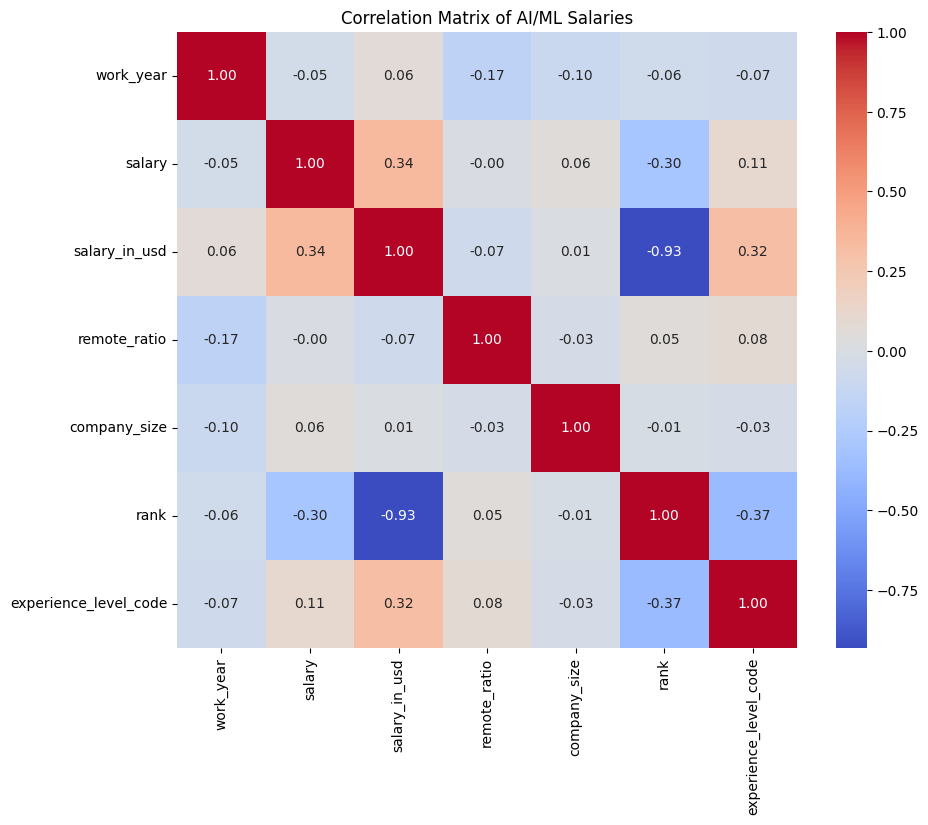

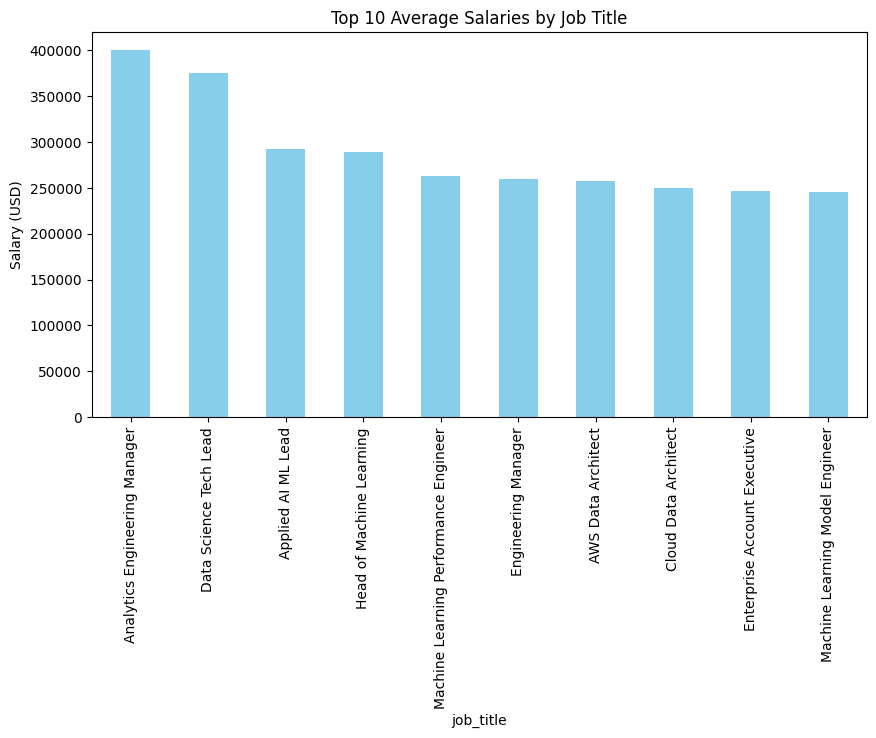

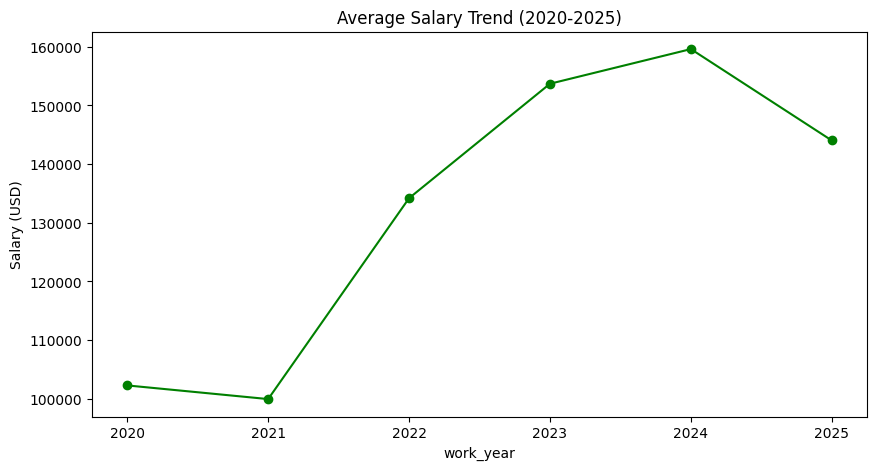

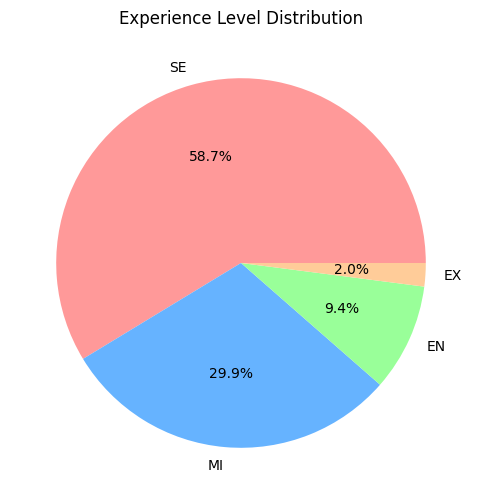

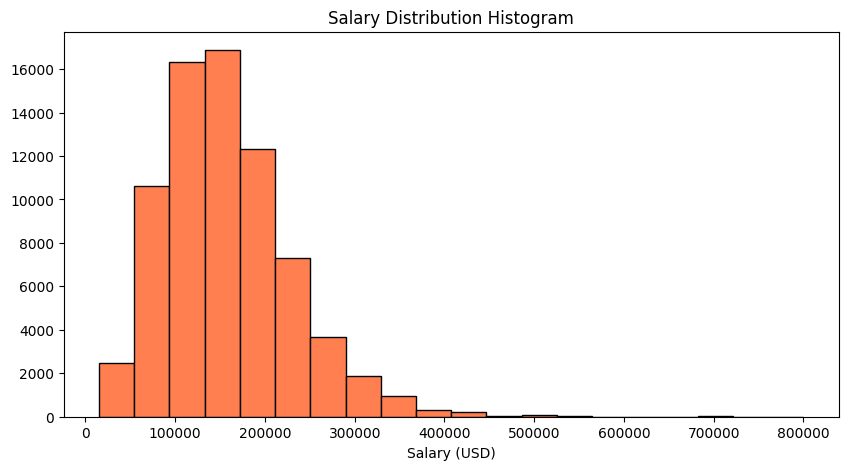

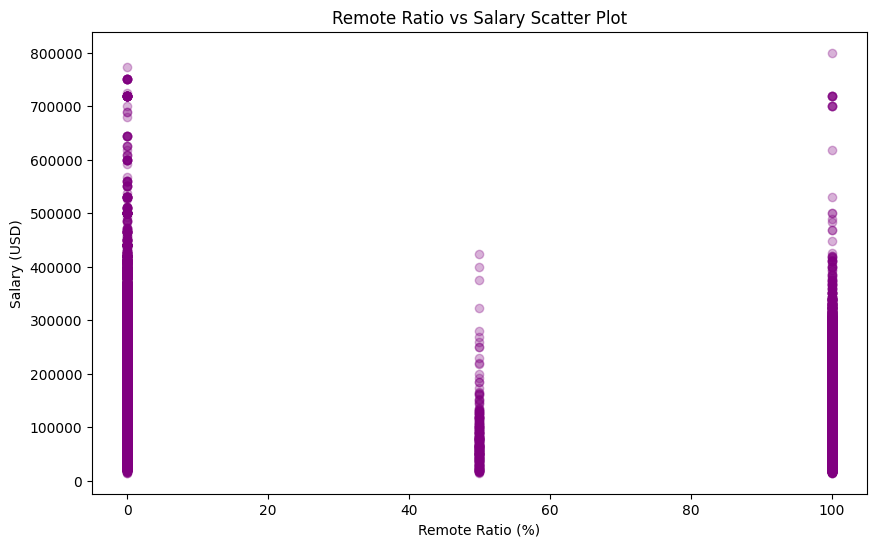

帥氣的助教想要幫我加分。


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# 1. 找定目標欄位

# 本專案的目標欄位為 'salary_in_usd' (美金年薪)，旨在預測與分析各項因素對薪資的影響。
path = kagglehub.dataset_download("cedricaubin/ai-ml-salaries")
csv_path = os.path.join(path, "salaries.csv")
df = pd.read_csv(csv_path)


# 2. 處理缺失值

# 檢查並處理缺失值，確保資料完整性
df = df.dropna(subset=['salary_in_usd', 'job_title']) # 刪除目標值缺失的資料
df = df.fillna(method='ffill') # 若有其他欄位缺失，以最接近的資料填補


# 3. 資料型態合理轉換 (Data Type Conversion)

# 將公司規模從類別轉換為有序數值，並確保年份與排名為整數型態
dic = {'S': 0, 'M': 1, 'L': 2}
df['company_size'] = df['company_size'].map(dic)
df['work_year'] = df['work_year'].astype(int)
df['rank'] = df['salary_in_usd'].rank(method='dense', ascending=False).astype(int)


# 4. 將資料完全編碼

# 將經驗等級進行 Label Encoding，使其具備強度的數值意義
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level_code'] = df['experience_level'].map(exp_map)


# 5. 劃出熱力圖

# 呈現所有數值特徵之間的相關係數，找出影響薪資最大的因素
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of AI/ML Salaries')
plt.show()

# 視覺化圖表產出

# (1) 長條圖 - 職位分群
plt.figure(figsize=(10, 5))
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Average Salaries by Job Title')
plt.ylabel('Salary (USD)')
plt.show()

# (2) 折線圖 - 年度分群
plt.figure(figsize=(10, 5))
df.groupby('work_year')['salary_in_usd'].mean().plot(marker='o', color='green')
plt.title('Average Salary Trend (2020-2025)')
plt.ylabel('Salary (USD)')
plt.show()

# (3) 圓餅圖 - 經驗等級分佈
plt.figure(figsize=(6, 6))
df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Experience Level Distribution')
plt.ylabel('')
plt.show()

# (4) 直方圖 - 薪資分佈
plt.figure(figsize=(10, 5))
plt.hist(df['salary_in_usd'], bins=20, color='coral', edgecolor='black')
plt.title('Salary Distribution Histogram')
plt.xlabel('Salary (USD)')
plt.show()

# (5) 散佈圖 - 遠端比例與薪資
plt.figure(figsize=(10, 6))
plt.scatter(df['remote_ratio'], df['salary_in_usd'], alpha=0.3, color='purple')
plt.title('Remote Ratio vs Salary Scatter Plot')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (USD)')
plt.show()

print("帥氣的助教想要幫我加分。")

MSE (均方誤差): 4849915588.60
R-squared (判定係數): 0.1069


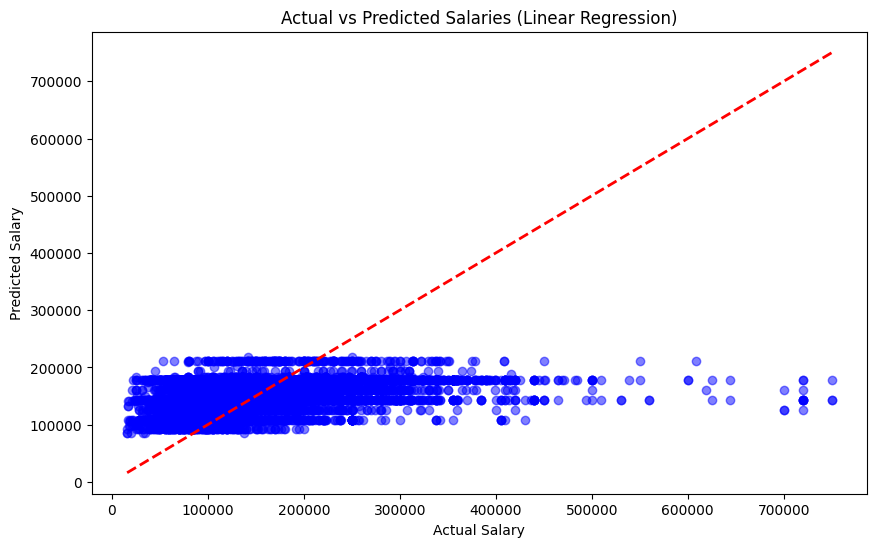

帥氣的助教想幫我加分


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# 1. 找定目標欄位與特徵
# ==========================================
# X 是我們用來預測的條件 (如經驗等級、遠端比例、公司規模)
# y 是我們要預測的目標 (薪資)
X = df[['experience_level_code', 'remote_ratio', 'company_size']]
y = df['salary_in_usd']

# ==========================================
# 2. 切分訓練集與測試集
# ==========================================
# 80% 資料用來訓練模型，20% 用來測試準確度
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 3. 建立並訓練模型
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train) # 擬合數據

# ==========================================
# 4. 預測與評估
# ==========================================
y_pred = model.predict(X_test)

print(f"MSE (均方誤差): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (判定係數): {r2_score(y_test, y_pred):.4f}")

# ==========================================
# 5. 視覺化回歸結果
# ==========================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Salaries (Linear Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

print("帥氣的助教想幫我加分")